In [204]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [205]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [206]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [207]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
train.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [209]:
categorical_cols = [col for col in train.columns
                   if (train[col].dtype == 'object' or train[col].dtype == 'int64') and
                   train[col].nunique() < 10]
categorical_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [210]:
# How many passengers survived according to Pclass?
pclass_survived = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()
pclass_survived['Percentage'] = round(pclass_survived['Survived'] / len(train) * 100, 2)
pclass_survived

,Pclass,Survived,Percentage
0,1,216,24.24
1,2,184,20.65
2,3,491,55.11


In [211]:
# How many passengers survived according to Age?
age_survived = (
    train[['Sex', 'Survived']]
    .groupby(['Sex'], as_index=False)
    .count()
    .sort_values(by='Survived', ascending=False)
)
age_survived['Percentage'] = round(age_survived['Survived'] / len(train) * 100, 2)
age_survived

,Sex,Survived,Percentage
1,male,577,64.76
0,female,314,35.24


In [212]:
# How many passengers survived according to SibSp
sibsp_survived = (
    train[['SibSp', 'Survived']]
    .groupby(['SibSp'], as_index=False)
    .count()
    .sort_values(by='Survived', ascending=False)
)
sibsp_survived['Percentage'] = round(sibsp_survived['Survived'] / len(train) * 100, 2)
sibsp_survived

,SibSp,Survived,Percentage
0,0,608,68.24
1,1,209,23.46
2,2,28,3.14
4,4,18,2.02
3,3,16,1.80
6,8,7,0.79
5,5,5,0.56


In [213]:
# How many passengers survived according to ParCh
parch_survived = (
    train[['Parch', 'Survived']]
    .groupby(['Parch'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)
parch_survived['Percentage'] = round(parch_survived['Survived'] / len(train) * 100, 2)
parch_survived

,Parch,Survived,Percentage
3,3,0.600000,0.07
1,1,0.550847,0.06
2,2,0.500000,0.06
0,0,0.343658,0.04
5,5,0.200000,0.02
4,4,0.000000,0.00
6,6,0.000000,0.00


In [214]:
# How many passengers survived according to place of embarkment?
embarkment_survived = (
    train[['Embarked', 'Survived']]
    .groupby(['Embarked'], as_index=False)
    .mean()
    .sort_values(by='Survived', ascending=False)
)
embarkment_survived['Percentage'] = round(embarkment_survived['Survived'] / len(train) * 100, 2)
embarkment_survived

,Embarked,Survived,Percentage
0,C,0.553571,0.06
1,Q,0.389610,0.04
2,S,0.336957,0.04


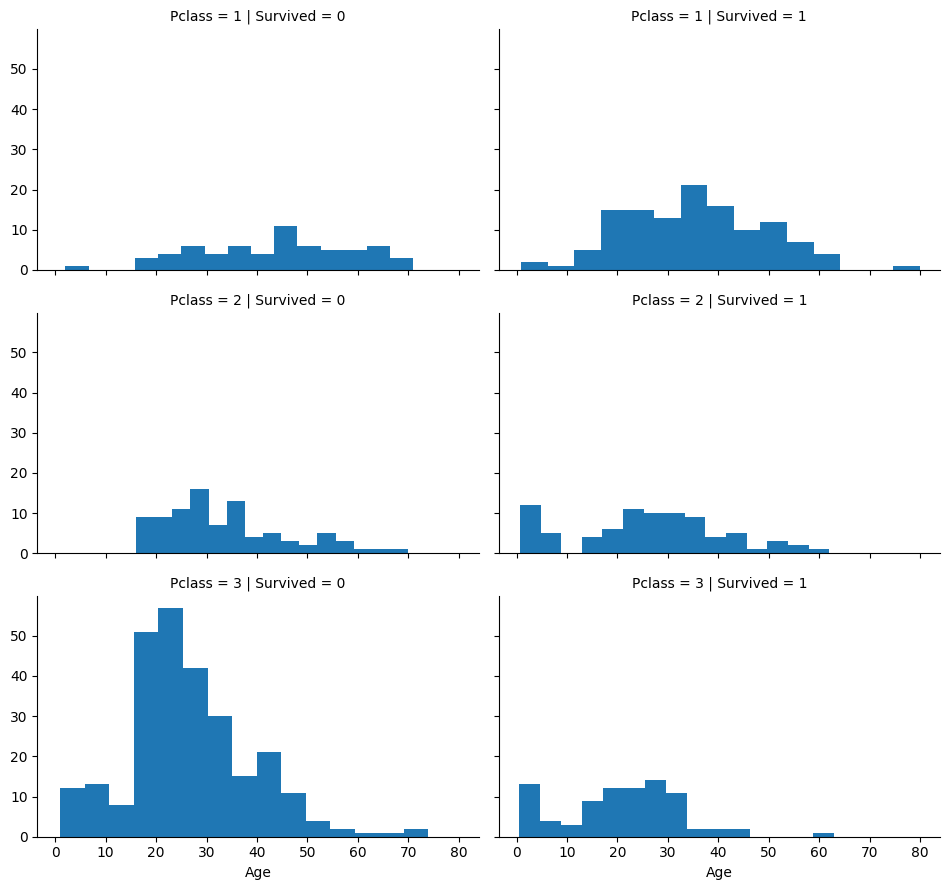

In [215]:
pclass_age_grid = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', bins=15)

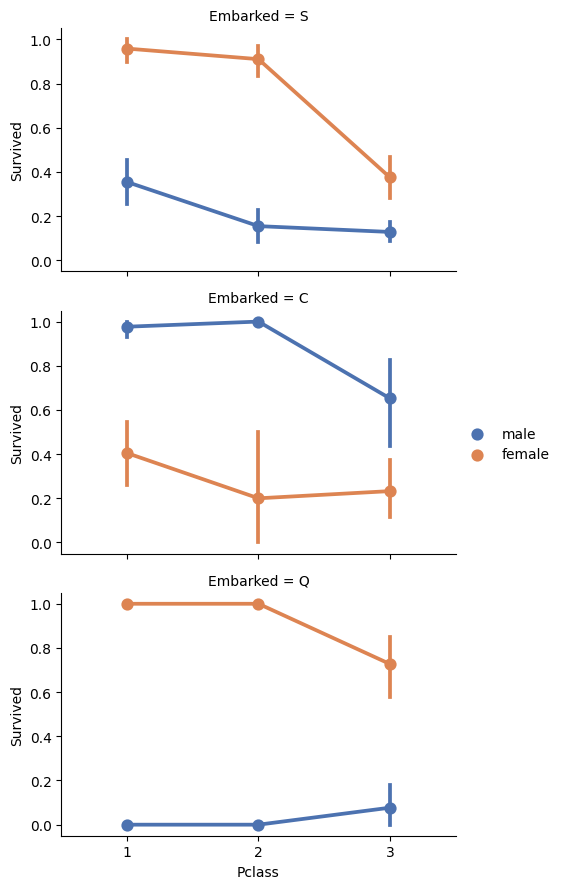

In [216]:
line_plt = sns.FacetGrid(train, row='Embarked', aspect=1.6)
line_plt.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
line_plt.add_legend()

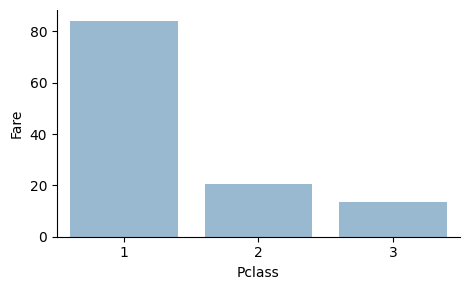

In [217]:
fare_pclass_grid = sns.FacetGrid(train, aspect=1.6)
fare_pclass_grid.map(sns.barplot, 'Pclass', 'Fare', alpha=.5, ci=None)

# Since there is a linear correlation between the fare and the Pclass, we can discard the fare

In [218]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Handle missing values of relevant columns

In [219]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [220]:
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [221]:
# Combine redundant titles
train['Title'] = train['Title'].replace(['Ms'], 'Miss')
test['Title'] = test['Title'].replace(['Ms'], 'Miss')

In [222]:
# Handle missing Age values in train
mean_age_per_title = train[['Title', 'Age']].groupby(['Title'], as_index=False).mean().round(1)
dict_age_per_title = mean_age_per_title.to_dict('index')
dict_age_per_title

{0: {'Title': 'Capt', 'Age': 70.0},
 1: {'Title': 'Col', 'Age': 58.0},
 2: {'Title': 'Countess', 'Age': 33.0},
 3: {'Title': 'Don', 'Age': 40.0},
 4: {'Title': 'Dr', 'Age': 42.0},
 5: {'Title': 'Jonkheer', 'Age': 38.0},
 6: {'Title': 'Lady', 'Age': 48.0},
 7: {'Title': 'Major', 'Age': 48.5},
 8: {'Title': 'Master', 'Age': 4.6},
 9: {'Title': 'Miss', 'Age': 21.8},
 10: {'Title': 'Mlle', 'Age': 24.0},
 11: {'Title': 'Mme', 'Age': 24.0},
 12: {'Title': 'Mr', 'Age': 32.4},
 13: {'Title': 'Mrs', 'Age': 35.9},
 14: {'Title': 'Rev', 'Age': 43.2},
 15: {'Title': 'Sir', 'Age': 49.0}}

In [223]:
train[train['Title'] == 'Mr'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr


In [224]:
for rec in range(0,len(dict_age_per_title.keys())):
    train.loc[train['Title'] == dict_age_per_title[rec]['Title'], 'Age'] = (
        train
        .loc[train['Title'] == dict_age_per_title[rec]['Title'], 'Age']
        .fillna(dict_age_per_title[rec]['Age'])
    )

train[train['Title'] == 'Mr'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,32.4,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr


In [225]:
# Handle missing Age values in test
mean_age_per_title = test[['Title', 'Age']].groupby(['Title'], as_index=False).mean().round(1)
dict_age_per_title = mean_age_per_title.to_dict('index')
dict_age_per_title

{0: {'Title': 'Col', 'Age': 50.0},
 1: {'Title': 'Dona', 'Age': 39.0},
 2: {'Title': 'Dr', 'Age': 53.0},
 3: {'Title': 'Master', 'Age': 7.4},
 4: {'Title': 'Miss', 'Age': 21.8},
 5: {'Title': 'Mr', 'Age': 32.0},
 6: {'Title': 'Mrs', 'Age': 38.9},
 7: {'Title': 'Rev', 'Age': 35.5}}

In [226]:
for rec in range(0,len(dict_age_per_title.keys())):
    test.loc[test['Title'] == dict_age_per_title[rec]['Title'], 'Age'] = (
        test
        .loc[test['Title'] == dict_age_per_title[rec]['Title'], 'Age']
        .fillna(dict_age_per_title[rec]['Age'])
    )

In [227]:
test[test['Title'] == 'Mr'].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr


## Feature Engineering

In [228]:
other_male_titles = ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir']
other_female_miss = ['Lady', 'Mlle']
other_female_mrs = ['Countess', 'Mme', 'Dona']

train['Title'] = train['Title'].replace(other_male_titles, 'Mr')
train['Title'] = train['Title'].replace(other_female_miss, 'Miss')
train['Title'] = train['Title'].replace(other_female_mrs, 'Mrs')

test['Title'] = test['Title'].replace(other_male_titles, 'Mr')
test['Title'] = test['Title'].replace(other_female_miss, 'Miss')
test['Title'] = test['Title'].replace(other_female_mrs, 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.161710
3,Mrs,0.795276


In [229]:
from sklearn.preprocessing import LabelEncoder

In [230]:
title_label_encoder = LabelEncoder()

train['Title'] = title_label_encoder.fit_transform(train['Title'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [264]:
dict(zip(title_label_encoder.transform(title_label_encoder.classes_), title_label_encoder.classes_))

{0: 'Master', 1: 'Miss', 2: 'Mr', 3: 'Mrs'}

In [231]:
test['Title'] = title_label_encoder.transform(test['Title'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [232]:
# Drop irrelevant columns
drop_cols = ['Name', 'Ticket', 'Fare', 'Cabin']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [233]:
train_y = train['Survived']
train = train.drop(['Survived'], axis=1)

train.shape, test.shape

((891, 8), (418, 8))

In [234]:
sex_label_encoder = LabelEncoder()
train['Sex'] = sex_label_encoder.fit_transform(train['Sex'])
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,3,1,22.0,1,0,S,2
1,2,1,0,38.0,1,0,C,3
2,3,3,0,26.0,0,0,S,1
3,4,1,0,35.0,1,0,S,3
4,5,3,1,35.0,0,0,S,2


In [235]:
test['Sex'] = sex_label_encoder.transform(test['Sex'])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,1,34.5,0,0,Q,2
1,893,3,0,47.0,1,0,S,3
2,894,2,1,62.0,0,0,Q,2
3,895,3,1,27.0,0,0,S,2
4,896,3,0,22.0,1,1,S,3


In [236]:
# Bucket age ranges
from collections import OrderedDict

buckets = OrderedDict({
    0: 5,
    1: 10,
    2: 20,
    3: 30,
    4: 40,
    5: 100,
})

def bucket_age(age):
    for k,v in buckets.items():
        if age <= v:
            return k

train_age_buckets = (
    train['Age'].apply(bucket_age)
)
test_age_buckets = (
    test['Age'].apply(bucket_age)
)

In [237]:
train['Age'] = train_age_buckets
test['Age'] = test_age_buckets

In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Pclass       891 non-null    int64 
 2   Sex          891 non-null    int64 
 3   Age          891 non-null    int64 
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Embarked     889 non-null    object
 7   Title        891 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 55.8+ KB


In [239]:
train[train['Embarked'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
61,62,1,0,4,0,0,NaN,1
829,830,1,0,5,0,0,NaN,3


In [240]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
data = imputer.fit_transform(train['Embarked'].values.reshape(-1,1)).ravel()

train['Embarked'] = data

In [241]:
embarked_label_encoder = LabelEncoder()

train['Embarked'] = embarked_label_encoder.fit_transform(train['Embarked'])

In [242]:
test['Embarked'] = embarked_label_encoder.transform(test['Embarked'])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,1,4,0,0,1,2
1,893,3,0,5,1,0,2,3
2,894,2,1,5,0,0,1,2
3,895,3,1,3,0,0,2,2
4,896,3,0,3,1,1,2,3


In [243]:
train.shape, train_y.shape, test.shape

((891, 8), (891,), (418, 8))

## Evaluation

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

In [245]:
X_train, X_valid, y_train, y_valid = train_test_split(train, train_y, test_size=0.2, random_state=20)


In [246]:
X_train = X_train.drop(['PassengerId'], axis=1)
X_valid = X_valid.drop(['PassengerId'], axis=1)

In [247]:
X_valid

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
347,3,0,4,1,0,2,3
674,2,1,4,0,0,2,2
791,2,1,2,0,0,2,2
836,3,1,3,0,0,2,2
56,2,0,3,0,0,2,1
...,...,...,...,...,...,...,...
694,1,1,5,0,0,2,2
428,3,1,4,0,0,1,2
431,3,0,4,1,0,2,3
563,3,1,4,0,0,2,2


In [248]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    
    pred_score = round(model.score(X_valid, y_valid) * 100, 2)
    return pred_score

In [249]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'Perceptron': Perceptron(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SGDClassifier': SGDClassifier()
}

for key in list(models.keys()):
    prediction_score = evaluate_model(models.get(key))
    
    print('Model: ', key, ' Score: ', prediction_score)

Model:  LogisticRegression  Score:  83.24
Model:  SVC  Score:  87.71
Model:  LinearSVC  Score:  81.56
Model:  RandomForestClassifier  Score:  81.01
Model:  KNeighborsClassifier  Score:  81.01
Model:  GaussianNB  Score:  86.03
Model:  Perceptron  Score:  78.77
Model:  DecisionTreeClassifier  Score:  78.21
Model:  SGDClassifier  Score:  79.33


# Try with test data

In [250]:
X_test = test.drop(['PassengerId'], axis=1)

In [251]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,3,1,4,0,0,1,2
1,3,0,5,1,0,2,3
2,2,1,5,0,0,1,2
3,3,1,3,0,0,2,2
4,3,0,3,1,1,2,3
...,...,...,...,...,...,...,...
413,3,1,4,0,0,2,2
414,1,0,4,0,0,0,3
415,3,1,4,0,0,2,2
416,3,1,4,0,0,2,2


In [252]:
selected_model = SVC()
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)

In [253]:
test_results = pd.concat([test, pd.Series(predictions)], axis=1).rename(columns={0: 'Survived'})

In [254]:
test_results.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Survived
0,892,3,1,4,0,0,1,2,0
1,893,3,0,5,1,0,2,3,1
2,894,2,1,5,0,0,1,2,0
3,895,3,1,3,0,0,2,2,0
4,896,3,0,3,1,1,2,3,1


In [255]:
test_results['Title'] = title_label_encoder.inverse_transform(test_results['Title'])
test_results['Sex'] = sex_label_encoder.inverse_transform(test_results['Sex'])
test_results['Embarked'] = embarked_label_encoder.inverse_transform(test_results['Embarked'])

In [256]:
test_results.groupby('Sex')['Survived'].count()

Sex
female    152
male      266
Name: Survived, dtype: int64

In [257]:
test_results.sort_values(by=['Survived'], ascending=False)[:10]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Survived
417,1309,3,male,1,1,1,C,Master,1
122,1014,1,female,4,1,0,C,Mrs,1
113,1005,3,female,2,0,0,Q,Miss,1
114,1006,1,female,5,1,0,S,Mrs,1
349,1241,2,female,4,0,0,S,Miss,1
218,1110,1,female,5,1,1,C,Mrs,1
117,1009,3,female,0,1,1,S,Miss,1
347,1239,3,female,4,0,0,C,Mrs,1
119,1011,2,female,3,1,0,S,Mrs,1
120,1012,2,female,2,0,0,S,Miss,1


In [275]:
# custom_test = test.drop(['PassengerId'], axis=1).iloc[1].values.reshape(1,-1)

custom_test = np.array([3,0,5,1,0,2,3]).reshape(1,-1)

print(custom_test)
res = selected_model.predict(custom_test)
# custom_test

[[3 0 5 1 0 2 3]]


In [277]:
res[0]

1

## Pickle the model

In [272]:
import pickle

filename='titanic_model.sav'
pickle.dump(selected_model, open(filename, 'wb'))